<a href="https://colab.research.google.com/github/praldemir12/Crimes/blob/main/MVP_puc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Análise de Dados e Boas Práticas**
**Prof. Tatiana Escoverdo e Hugo Villamizar**

**Aluno: Aldemir Rodrigues Junior**

## **1. Definição do Problema (Crimes contra a vida)**

Série histórica anual no estado desde 1991 (taxas por 100 mil habitantes). As estatísticas são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria do Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares que são fornecidas pela Secretaria do Estado de Polícia Militar do Rio de Janeiro (SEPM). Os registros de ocorrência são submetidos ao controle de qualidade realizado pela Corregedoria Geral da Polícia (CGPOL) da Secretaria de Estado de Polícia Civil e, posteriormente, consolidados pelo ISP. As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.
Proposições: 
- A violência está aumentando ou diminuindo?
- Em que região do Rio de Janeiro há mais casos de crimes contra a vida?
- Lugares com maior densidade populacional implica em maior quantidade de crimes? 

**Classificação**:  Letalidade violenta

**Fonte:**  ISP Dados Abertos - Secretaria de Segurança Pública RJ
**link:** http://www.ispdados.rj.gov.br/CrimesVida.html

**Informações sobre os atributos:**


**1. ano** - Anos que abrangem o período de 1991 a 2020

**2. area geográfica** - Dividida por: Estado, Zona norte, etc

**3. delito** - Tipos de delitos que resultaram em morte

**4. contagem** - Numero de casos registrados

**5. populacao** - Número de habitantes por região

**6. taxa por 100 mil habitantes** - percentual calculado (contagem/populacao)*100.000


## **2. Carga de Dados**

Usaremos o pacote Pandas (Python Data Analysis Library) para ler um arquivo .csv com cabeçalho disponível online.

In [1]:
# Imports
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/praldemir12/Crimes/main/SeriesHistoricas.csv"

# Lê o arquivo utilizando separador ";" e encoding "latin1" por se tratar de base em de língua portuguesa
dataset = pd.read_csv(url, delimiter=';', encoding="latin1")


In [4]:
# Verifica se a variável dataset é um objeto DataFrame
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [5]:
#Lê as primeiras 5 linhas do dataset
dataset.head()

,ano,area geografica,delito,contagem,populacao,taxa por 100 mil habitantes
0,1991,Estado,Letalidade Violenta,7.723,12.807.706,"60,3"
1,1992,Estado,Letalidade Violenta,7.923,12.975.915,"61,1"
2,1993,Estado,Letalidade Violenta,7.985,13.146.333,"60,7"
3,1994,Estado,Letalidade Violenta,8.631,13.318.990,"64,8"
4,1995,Estado,Letalidade Violenta,8.638,13.493.914,"64,0"


## **3. Análise de Dados**


### **3.1. Estatísticas Descritivas**

Examinaremos as dimensões do dataset, informações e exemplos de linhas.

In [6]:
# Dimensões
print(dataset.shape)

(383, 6)


In [7]:
# Informações
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          383 non-null    int64  
 1   area geografica              383 non-null    object 
 2   delito                       383 non-null    object 
 3   contagem                     383 non-null    float64
 4   populacao                    383 non-null    object 
 5   taxa por 100 mil habitantes  383 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 18.1+ KB
None


In [8]:
# Obtém contagens de valores únicos para a coluna "delito"
contagens_delito = dataset["delito"].value_counts()

# Exibe as contagens de valores únicos para a coluna "delito"
print(contagens_delito)

Letalidade Violenta                          133
Homicídio Doloso                             133
Morte por Intervencao do Agente do Estado    117
Name: delito, dtype: int64


In [9]:
# Obtém contagens de valores únicos para a coluna "area geografica"
contagens_areageo = dataset["area geografica"].value_counts()

# Exibe as contagens de valores únicos para a coluna "area geografica"
print(contagens_areageo)

Estado                89
Capital               87
Baixada Fluminense    69
Grande Niteroi        69
Interior              69
Name: area geografica, dtype: int64


In [10]:
# 10 primeiras linhas do dataset
dataset.head(10)

,ano,area geografica,delito,contagem,populacao,taxa por 100 mil habitantes
0,1991,Estado,Letalidade Violenta,7.723,12.807.706,"60,3"
1,1992,Estado,Letalidade Violenta,7.923,12.975.915,"61,1"
2,1993,Estado,Letalidade Violenta,7.985,13.146.333,"60,7"
3,1994,Estado,Letalidade Violenta,8.631,13.318.990,"64,8"
4,1995,Estado,Letalidade Violenta,8.638,13.493.914,"64,0"
5,1996,Estado,Letalidade Violenta,7.425,13.671.135,"54,3"
6,1997,Estado,Letalidade Violenta,7.040,13.850.684,"50,8"
7,1998,Estado,Letalidade Violenta,6.371,14.032.591,"45,4"
8,1999,Estado,Letalidade Violenta,6.401,14.216.887,"45,0"
9,2000,Estado,Letalidade Violenta,6.993,14.403.603,"48,6"


In [11]:
# Imports
import pandas as pd
# Carrega o dataset
url = "https://raw.githubusercontent.com/praldemir12/Crimes/main/SeriesHistoricas.csv"
df = pd.read_csv(url, delimiter=';', encoding="latin1", decimal=",")
df.head(10)

,ano,area geografica,delito,contagem,populacao,taxa por 100 mil habitantes
0,1991,Estado,Letalidade Violenta,7.723,12.807.706,60.3
1,1992,Estado,Letalidade Violenta,7.923,12.975.915,61.1
2,1993,Estado,Letalidade Violenta,7.985,13.146.333,60.7
3,1994,Estado,Letalidade Violenta,8.631,13.318.990,64.8
4,1995,Estado,Letalidade Violenta,8.638,13.493.914,64.0
5,1996,Estado,Letalidade Violenta,7.425,13.671.135,54.3
6,1997,Estado,Letalidade Violenta,7.040,13.850.684,50.8
7,1998,Estado,Letalidade Violenta,6.371,14.032.591,45.4
8,1999,Estado,Letalidade Violenta,6.401,14.216.887,45.0
9,2000,Estado,Letalidade Violenta,6.993,14.403.603,48.6


In [12]:
# 10 últimas linhas do dataset
dataset.tail(10)

,ano,area geografica,delito,contagem,populacao,taxa por 100 mil habitantes
373,2013,Interior,Morte por Intervencao do Agente do Estado,20.0,4.561.628,"0,4"
374,2014,Interior,Morte por Intervencao do Agente do Estado,45.0,4.603.865,"1,0"
375,2015,Interior,Morte por Intervencao do Agente do Estado,48.0,4.644.659,"1,0"
376,2016,Interior,Morte por Intervencao do Agente do Estado,80.0,4.683.865,"1,7"
377,2017,Interior,Morte por Intervencao do Agente do Estado,95.0,4.722.135,"2,0"
378,2018,Interior,Morte por Intervencao do Agente do Estado,190.0,4.851.156,"3,9"
379,2019,Interior,Morte por Intervencao do Agente do Estado,209.0,4.895.523,"4,3"
380,2020,Interior,Morte por Intervencao do Agente do Estado,176.0,4.938.306,"3,6"
381,2021,Interior,Morte por Intervencao do Agente do Estado,179.0,4.979.358,"3,6"
382,2022,Interior,Morte por Intervencao do Agente do Estado,200.0,5.020.953,"4,0"


### **3.2. Visualizações**

Análise feita sobre os dados a fim de verificar as regiões do RJ onde mais ocorreram crimes no período de 1991 a 2022

1 - Qual a região do RJ com maior e o menor índice de crimes de morte?

2 - A violência no RJ está aumentando ou diminuindo?

3 - Existe relação entre a quantidade de crimes de morte praticados pela polícia militar e os outros tipos de delitos?

4 - Qual o total de mortes por ano e qual o tipo de delito de maior ocorrência?


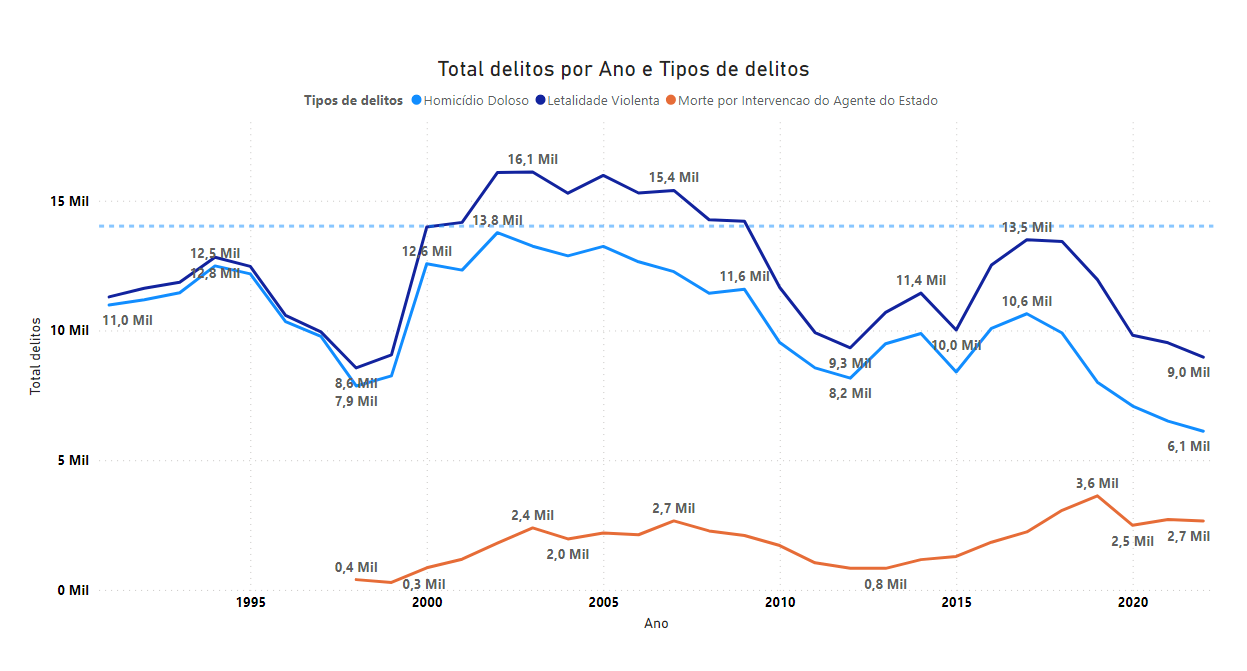

Verificamos no gráfico acima que o pico da violência ocorreu nos anos 2000 na faixa de 15 mil casos, voltando em 2017 e 2018 a este nível e em 2022 caiu para 6 mil casos. Desta forma podemos responder que a quantidade de crimes de morte no Estado do RJ vem diminuindo.
Sobre a questão das mortes praticadas pela polícia podemos verificar que não existe uma relação proporcional, ao longo dos anos analisados, em comparação com os outros tipos de delitos.

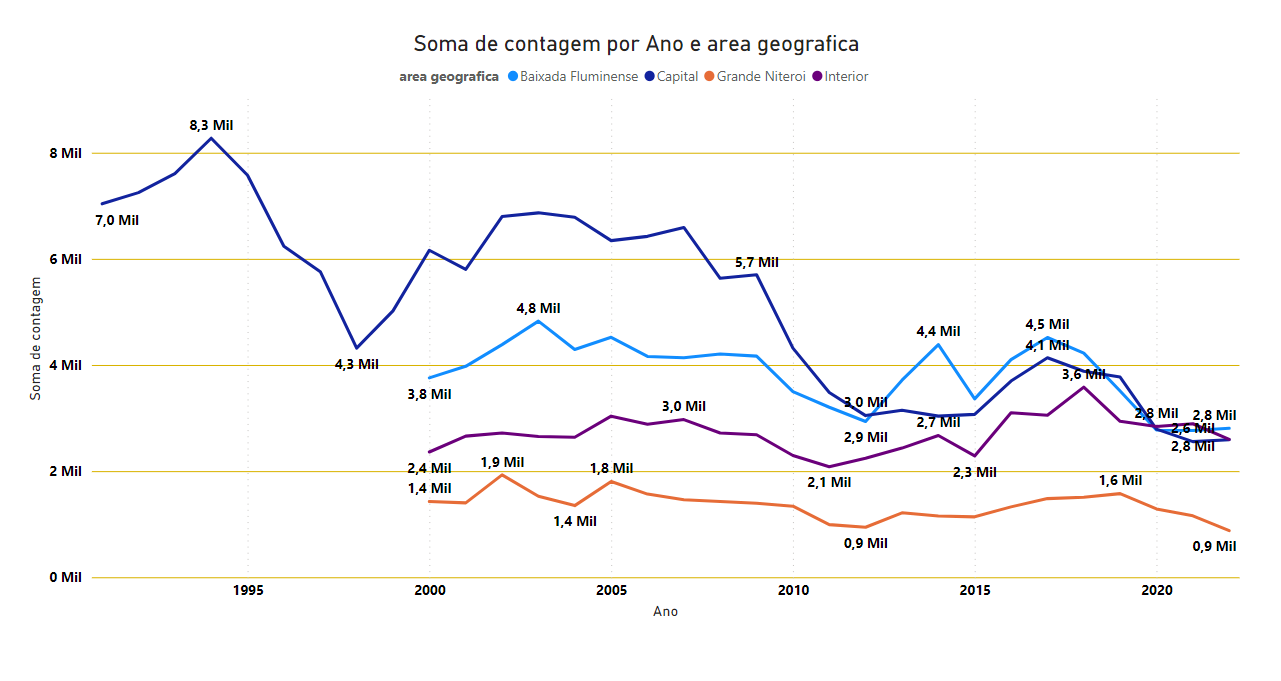

Analisando os dados estatísticos verifiquei que a Capital possui 87 valores únicos enquanto que as outras regiões tem 69 cada. Daí montei outro gráfico e para minha surpresa mudou completamente o diagnóstico. Grande Niterói continua sendo a região com menos mortes no Estado, mas as outras regiões nos anos recentes estão quase em linha, na faixa de 2,5 mil delitos por ano.

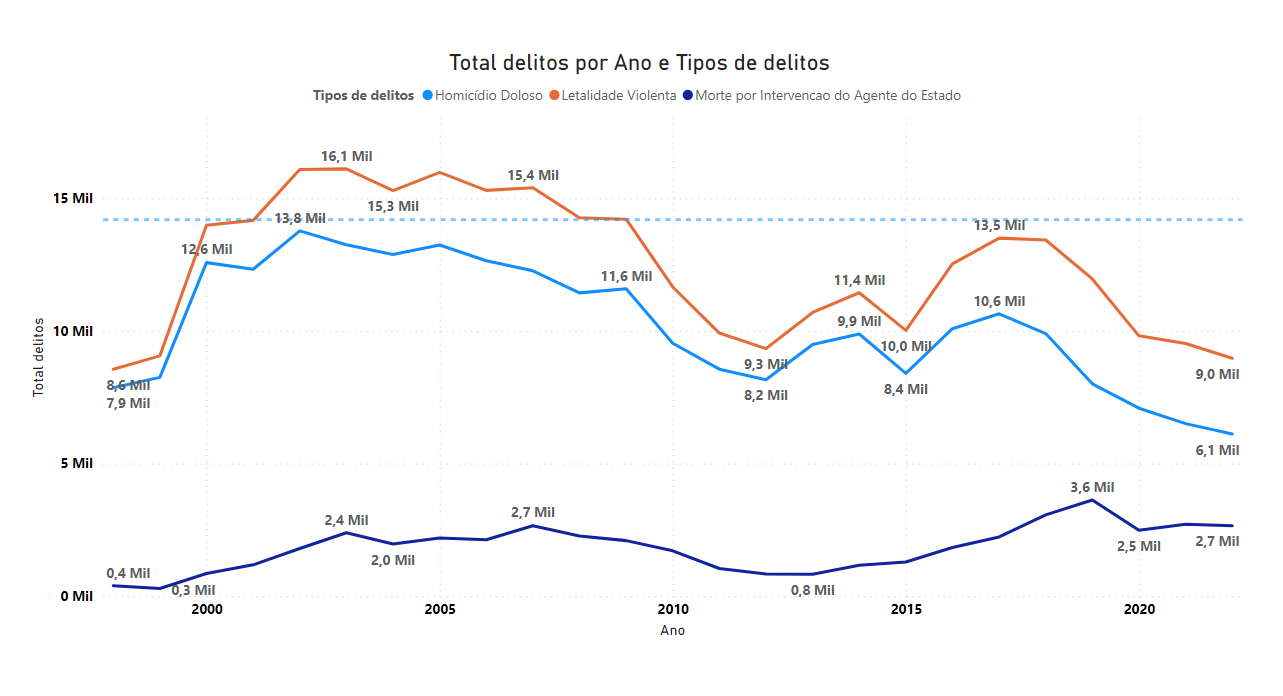

Filtrei o período do dataset a fim de manter uma relação entre os 3 tipos de delito. Não há contagem de registros de Mortes por intervenção do Agente do Estado no período de 1991 para 1998. Desta forma o período ficou de 1998 a 2022(25 anos).

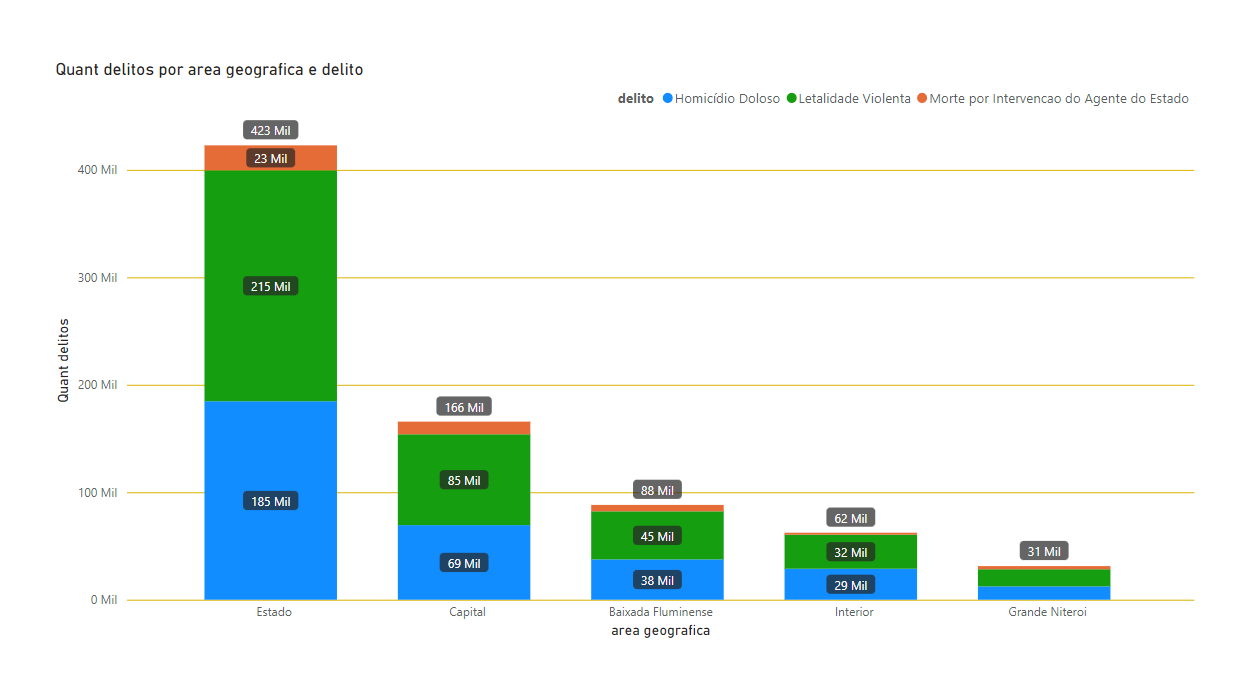

Este gráfico de barras demonstra que a região do RJ que tem o menor índice de mortes é o Grande Niteroi e a Capital o maior índice em toda a série. Este gráfico inclui o total de delitos por morte no Estado.

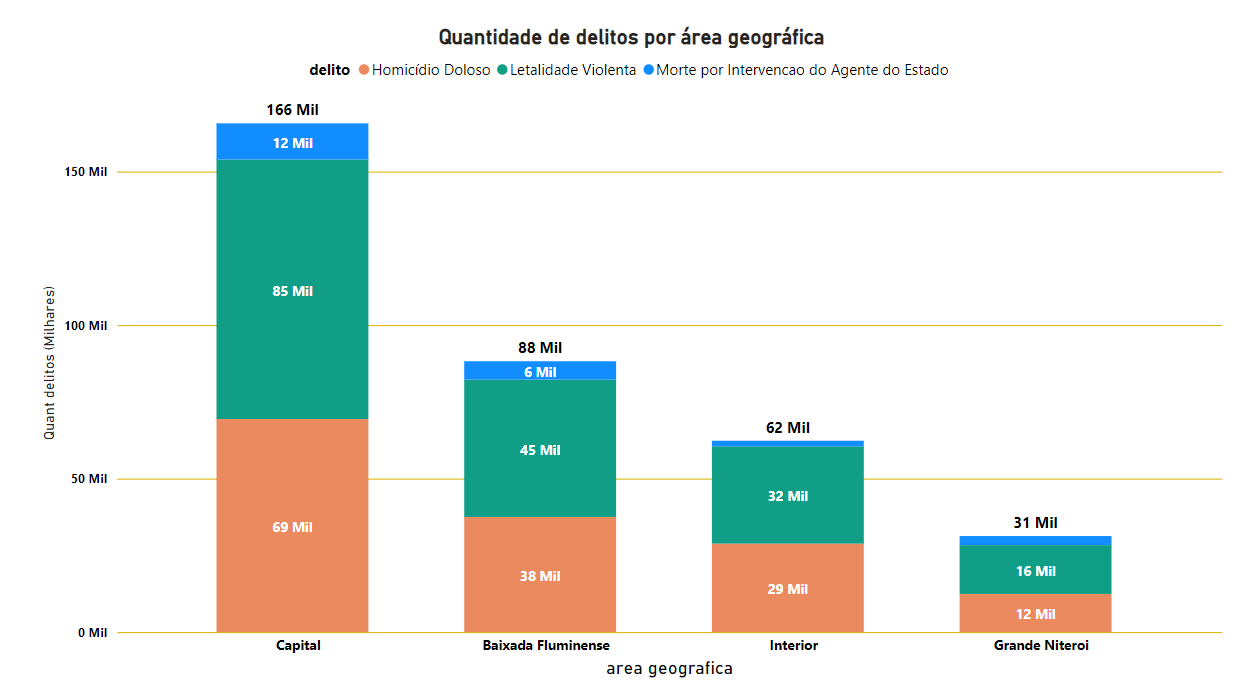

Dataset ajustado sem os dados do Estado a fim de melhorar a comparabilidade dos tipos, pois a ideia não é fazer uma análise em função do Estado.

## **4. Pré-Processamento de dados**

### **4.1. Tratamento de Missings e Limpeza**

In [13]:
# verificando nulls no dataset
dataset.isnull().sum()

ano                            0
area geografica                0
delito                         0
contagem                       0
populacao                      0
taxa por 100 mil habitantes    0
dtype: int64

Verifiquei que existem missing no dataset no período de 1991 a 1997 e excluimos no início do processo para evitar distorcer as informações dos gráficos

## **Conclusão**

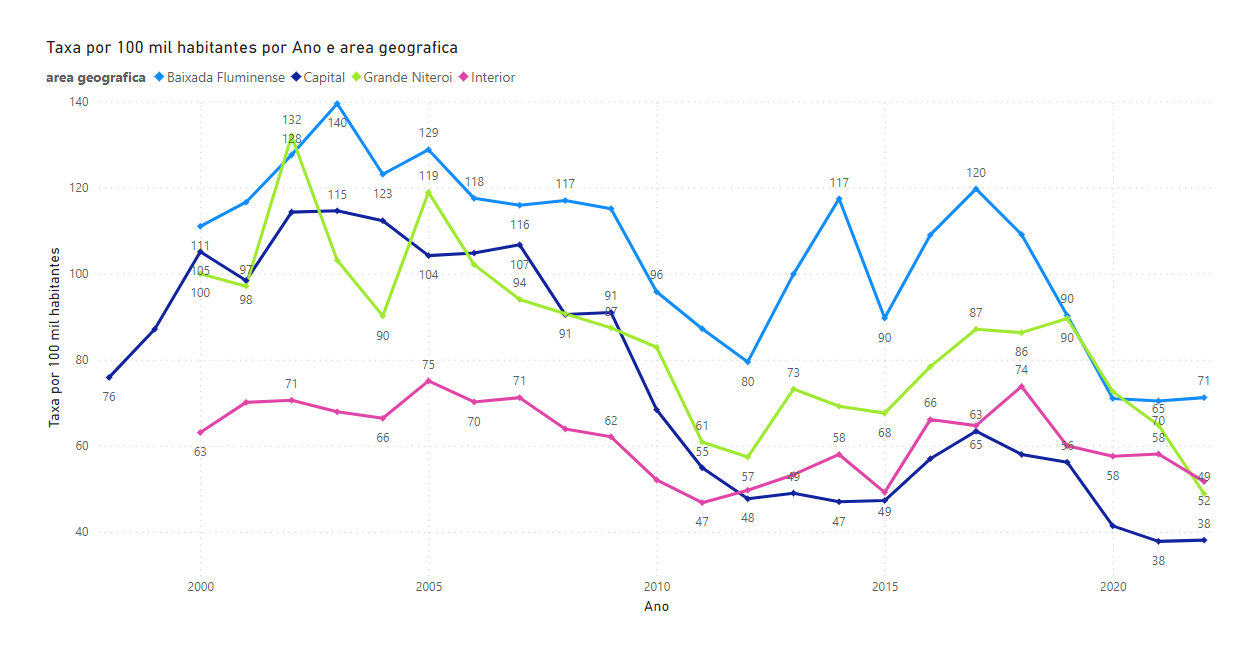

Após aplicar a análise de dados e visualizações pude identificar que algumas respostas precisam ser baseadas na taxa por 100 mil habitantes, ao invés de apenas considerar a quantidade de delitos. Uma região que possui muitos habitantes precisa ser avalida de forma diferente de outra menos populosa. Dai o gráfico acima demonstra que a região com menos incidência de crimes de morte é o Interior e não o Grande Niteroi e a que tem mais registros de crimes é a Baixada Fluminense, mudando completamente a conclusão que tive anteriormente sobre a região do Rio de Janeiro com mais incidência de crimes de morte do Estado.